# Week 4 part 3 - [Matplotlib](https://matplotlib.org)

Matplotlib is a really flexible Python module for creating plots, charts, graphs, and animations. We'll look at some of the basic plotting commands in `matplotlib.pyplot`.  We import this with the `import ... as ...` syntax to cut down on typing.

**Important:** you must include the magic command `%matplotlib inline` to make matplotlib work correctly in a Jupyter notebook. You only need to do this once per notebook.

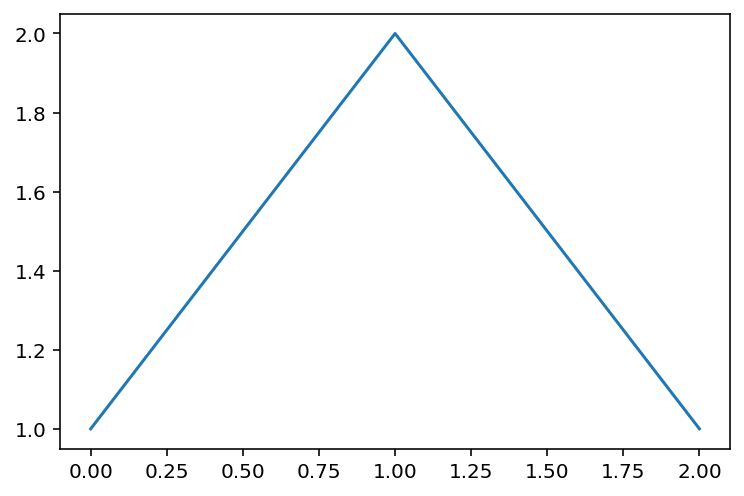

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([0, 1, 2], [1, 2, 1])

The most basic `matplotlib` plotting command is `plot`. The simplest form of plot takes two arguments, a list (or a numpy array) `[x0, x1, ...]` of x-coordinates and a list (or numpy array) `[y0, y1, ...]` of y-coordinates.  It draws a straight line from `(x0, y0)` to `(x1, y1)`, a straight line from `(x1, y1)` to `(x2, y2)`, and so on.  In the plot above, the two argumets are `[0, 1, 2]` and `[1, 2, 1]` so the line goes from `(0,1)` to `(1, 2)` to `(2,1)`.

We can use `plot` to draw graphs of functions.  If we want the graph of $y = f(x)$ between $x=a$ and $x=b$ we need to generate a list `[x0, x1, ..., xN]` of x-values with `x0 = a` and `xN = b` and another list `[f(x0), f(x1), ..., f(xN)]` giving the y-coordinates.  So long as we choose `N` large enough (and so long as $f$ is nice enough) this should look like the graph of $y=f(x)$.

Let's plot $y= \sin(x)$ for $0 \leq x \leq 2 \pi$.  There are lots of ways to produce a list of x-coordinates, but the easiest is to use numpy's `linspace(a, b, N)` command which returns an array of shape `(N,)` consisting of `N` equally spaced points starting at `a` and ending at `b`.  To get the y-coordinates, it's simplest to use a list comprehension:

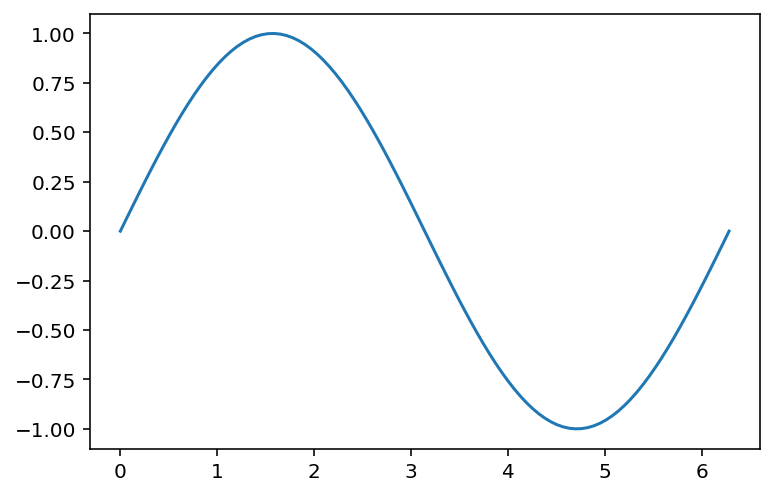

In [2]:
import numpy as np
import math
xs = np.linspace(0, 2 * math.pi, 100) # the list of x-coordinates
ys = [math.sin(x) for x in xs] # the list of y-coordinates
plt.plot(xs, ys)

You can see that 100 equally spaced points is enough to make a fairly smooth-looking graph at this scale.

If we want another curve on the same axes, we can just add another `plot` command.

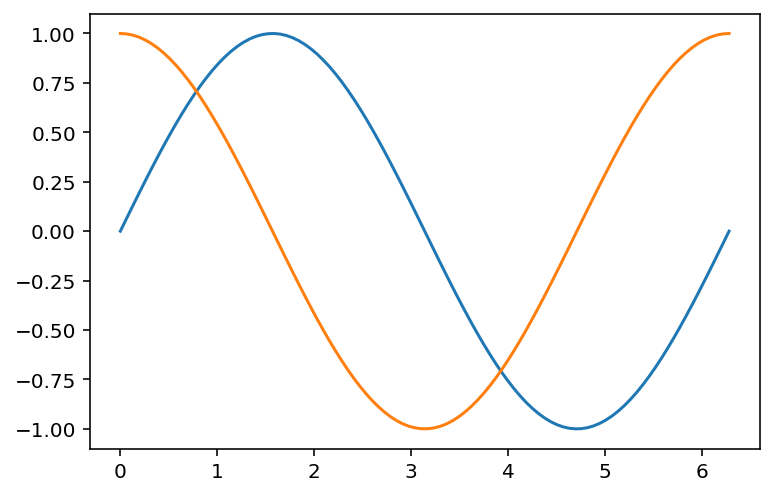

In [3]:
xs = np.linspace(0, 2 * math.pi, 100)
ys = [math.sin(x) for x in xs]
zs = [math.cos(x) for x in xs]
plt.plot(xs, ys)
plt.plot(xs, zs)

`plot` has hundreds of different options, which you can read about in [the documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). For example, we can add an extra argument `'r+'` which means "plot the points in red, and draw a + at each point instead of joining the points with lines, or `'g--'` which means to use green dashed lines.

There are also a pyplot command `title` for giving the plot a title, `grid` for adding grid lines, `xlabel` and `ylabel` for labelling the axes, and `legend` for adding a key.  If you want to use `legend` you have to supply an extra argument `label="..."` to the `plot` commands.

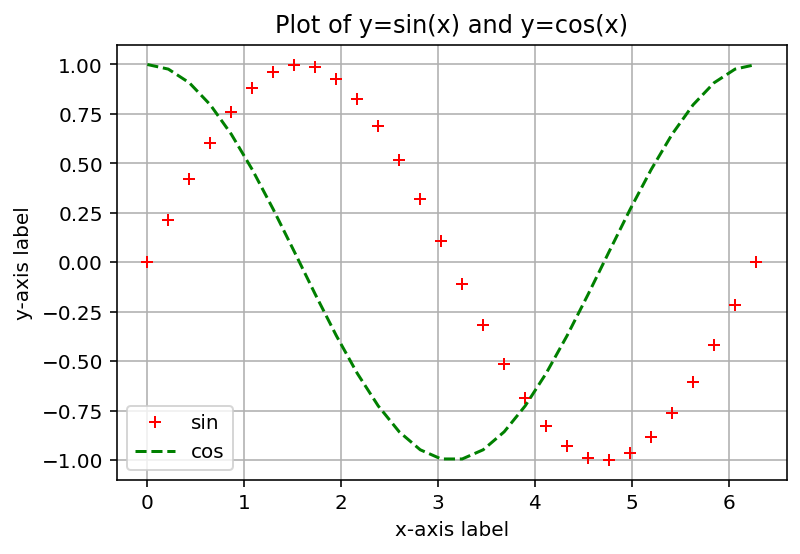

In [4]:
xs = np.linspace(0, 2 * math.pi, 30)
ys = [math.sin(x) for x in xs]
zs = [math.cos(x) for x in xs]
plt.plot(xs, ys, 'r+', label="sin") # use red plus signs for each point
plt.plot(xs, zs, 'g--', label="cos") # use a dotted green line
plt.title("Plot of y=sin(x) and y=cos(x)")
plt.xlabel("x-axis label")
plt.ylabel("y-axis label")
plt.legend()
plt.grid()

## Functions with optional named arguments

The function `plt.plot` is behaving in a way you haven't yet seen in this course.  We called it initially with `plt.plot(xs, ys)`, but later with `plt.plot(xs, ys, 'r+', label="sin")`.  How can the same function accept different numbers of arguments, and what is `label=` for?

The answer is that `plt.plot` has many different arguments, but they have default values which get used if you don't specify alternatives.  You can do this in your own code as follows:

In [0]:
def f(a = 10, b = 20): # 10 is the default value for a, 20 is the default value for b
    return 2 * a + b

Now
 - `f(1, 2)` returns `2 * 1 + 2`, the usual behaviour you've seen so far. 
 - `f(100)` is equivalent to `f(100, 20)` (`b` wasn't specified, so it gets its default value of 20).
 - `f(b = 100)` is equivalent to `f(10, 100)` (`a` wasn't specified, so it gets its default value of 10).
 - `f()` is equivalent to `f(10, 20)` (neither `a` nor `b` was specified, so both get their default values).
 - `f(b = 100, a = 200)` is equivalent to `f(200, 100)`.

Try these out in the next code cell and predict what the output will be.

In [0]:
f(b = 100)

## Histograms

The other plot type we'll look at is [`plt.hist`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html), which makes [histograms](https://en.wikipedia.org/wiki/Histogram) or bar charts.

Say you rolled a dice 20 times and stored the results in a list called `rolls`.  You want to plot a bar chart where the height of the $i$th bar tells you how many times you rolled $i$, so that you can judge whether the dice is fair or not.  We will use the [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html) function to simulate dice rolls: if you call `np.random.choice(choices, N)` it chooses `N` elements from the list `choices` uniformly at random (with replacement) and returns them in a numpy array.

The first argument to `plt.hist` should be the list of values you want to plot a histogram of, in this case `rolls`.  You don't actually have to supply any other arguments...

In [0]:
faces = [1, 2, 3, 4, 5, 6]
rolls = np.random.choice(faces, 20) # 20 uniform random choices from the list of faces
print(rolls)
plt.hist(rolls)

...but the bars may not look exactly how you want.  The most important other argument for `plt.hist` is called `bins`.  If you specify a positive integer for `bins`, e.g. `bins = 10`, then there will be 10 equal-width bars.  (In fact `bins = 10` is the default value, as you can see in the chart above, although some of them have height zero).  If you specify a list for bins, e.g. `bins = [b0, b1, b2,..., bN]` then there will be one bar for each interval $$[b_0, b_1), [b_1, b_2), \ldots, [b_{N-2}, b_{N-1}), [b_{N-1}, b_N].$$  These intervals are called bins, datapoints not lying in any bin are ignored.

For our `rolls` data, it would be more appropriate to use bins like this:

In [0]:
plt.hist(rolls, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

so that the bars have their centre above the numbers 1, 2, 3, 4, 5, 6.

**Why isn't `plt.hist(rolls, bins = [1, 2, 3, 4, 5, 6])` a good idea for our data?**  (HINT: count the bars.)

One final useful argument for `plt.hist` is `density = True`. This scales the height of the bars so that the total bar area is 1.

You can also use the `title`, `xlabel`, and `ylabel` methods just as we did before to set the title of the histogram and to label the axes.

In [0]:
plt.hist(rolls, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], density=True)
plt.title("Density histogram for 20 random dice rolls")
plt.xlabel("Face")
plt.ylabel("Density")

If you want to draw different types of chart on the same axis, you can do that.

In [0]:
plt.hist(rolls, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], density=True)
plt.plot([1, 6.5],[0, 0.35])

## Unassessed exercises

### Exercise 1 - plot some graphs

Plot the graph of $y = \cos(x)$ between $0$ and $\pi$ using 500 equally spaced x-coordinates.

Then plot $y=\cos(4x)$ on the same axes.

If you didn't run the cell earlier that contained `%matplotlib inline`, either go and do it or add `%matplotlib inline` to the top of the next code cell, otherwise your plots won't show up.

### Exercise 2 - scatter plot

This exercise is about a variation on `plt.plot` called `plt.scatter` which makes scatter plots.

`plt.scatter(xs,ys)` takes a list `xs` of x-values and a list `ys` of y-value and plots a dot at the position with coordinates `(xs[i], ys[i])` for each `i` - you can [read the full documentation at this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).  For example, `plt.scatter([1,2],[3,4])` will make a dot at position (1, 3) and (2, 4)

In [0]:
plt.scatter([1,2],[3,4])

You can control how big the dots are by setting an optional parameter `s`, e.g. `plt.scatter(xs, ys, s=0.5)` will make the dots fairly small.

**Use `plt.scatter` to plot the points with coordinates $(\sin(n), \sin(2n+1))$ for $n=0, 1, 2, \ldots, 1000$**. What shape do you expect to get?

(SUGGESTION: generate a list of all the x-coordinates, then a list of all y-coordinates and then call `plt.scatter`. If instead you find the first point, then call `plt.scatter` to plot it, then find the next point, then call `plt.scatter` again, your code will a very long time to work.  Only call `plt.scatter` once, after you have generated all the points you want it to plot).

Now generate an array or list `xs` of 1000 observations from a standard normal random variable (check the `numpy.random` section above for how to do this) and another array or list `ys` of 1000 observations from a standard normal random variable, and make a scatter plot using these x and y coordinates.  Try to predict what shape you will get.